<font color=red size=3> 模块一 导入模块、数据与数据预览 </font>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,

          'legend.fontsize': med,

          'figure.figsize': (12, 8),

          'axes.labelsize': med,

          'axes.titlesize': med,

          'xtick.labelsize': med,

          'ytick.labelsize': med,

          'figure.titlesize': large}

plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

<font color=red size=3> 模块二  数据准备 </font>

<font color=red size=3> 2.1  处理过的产品数据准备 </font>

In [4]:
data_product=pd.read_csv('d:data/jd/data_product_new.csv')

In [5]:
data_product.head()

,Unnamed: 0,sku_id,a1,a2,a3,cate,brand,brand_sku_count,comment_num,has_bad_comment,...,brand_click_time,a1_click_amount,a1_order_amount,a2_click_amount,a2_order_amount,a3_click_amount,a3_order_amount,click_buy_timegap,cart_buy_timegap,collect_buy_timegap
0,0,10011,3.0,1.0,1.0,8.0,214.0,6444.0,4.0,1.0,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
1,1,101116,3.0,1.0,1.0,8.0,214.0,6444.0,3.0,0.0,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
2,2,10133,3.0,1.0,1.0,8.0,214.0,6444.0,3.0,1.0,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
3,3,10223,3.0,1.0,1.0,8.0,214.0,6444.0,NaN,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
4,4,103386,3.0,1.0,1.0,8.0,214.0,6444.0,4.0,1.0,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN


In [6]:
data_product=data_product.drop(columns='Unnamed: 0')

In [7]:
data_product.head()

,sku_id,a1,a2,a3,cate,brand,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,...,brand_click_time,a1_click_amount,a1_order_amount,a2_click_amount,a2_order_amount,a3_click_amount,a3_order_amount,click_buy_timegap,cart_buy_timegap,collect_buy_timegap
0,10011,3.0,1.0,1.0,8.0,214.0,6444.0,4.0,1.0,0.0239,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,8.0,214.0,6444.0,3.0,0.0,0.0000,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
2,10133,3.0,1.0,1.0,8.0,214.0,6444.0,3.0,1.0,0.0294,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
3,10223,3.0,1.0,1.0,8.0,214.0,6444.0,NaN,NaN,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
4,103386,3.0,1.0,1.0,8.0,214.0,6444.0,4.0,1.0,0.0213,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN


In [8]:
data_product=data_product.drop(columns=['cate','brand'])
data_product.head()

,sku_id,a1,a2,a3,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,product_click_amount,product_cart_amount,...,brand_click_time,a1_click_amount,a1_order_amount,a2_click_amount,a2_order_amount,a3_click_amount,a3_order_amount,click_buy_timegap,cart_buy_timegap,collect_buy_timegap
0,10011,3.0,1.0,1.0,6444.0,4.0,1.0,0.0239,6.0,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,6444.0,3.0,0.0,0.0000,214.0,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
2,10133,3.0,1.0,1.0,6444.0,3.0,1.0,0.0294,305.0,5.0,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
3,10223,3.0,1.0,1.0,6444.0,NaN,NaN,NaN,72.0,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN
4,103386,3.0,1.0,1.0,6444.0,4.0,1.0,0.0213,8.0,NaN,...,28691869.0,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN


In [9]:
data_product.sku_id.drop_duplicates().count()

25931

In [10]:
data_product['product_conversion_ratio']=data_product.apply(lambda x:x['product_order_amount']/x['product_click_amount'],axis=1)

In [11]:
data_product.head()

,sku_id,a1,a2,a3,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,product_click_amount,product_cart_amount,...,a1_click_amount,a1_order_amount,a2_click_amount,a2_order_amount,a3_click_amount,a3_order_amount,click_buy_timegap,cart_buy_timegap,collect_buy_timegap,product_conversion_ratio
0,10011,3.0,1.0,1.0,6444.0,4.0,1.0,0.0239,6.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,6444.0,3.0,0.0,0.0000,214.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
2,10133,3.0,1.0,1.0,6444.0,3.0,1.0,0.0294,305.0,5.0,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
3,10223,3.0,1.0,1.0,6444.0,NaN,NaN,NaN,72.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
4,103386,3.0,1.0,1.0,6444.0,4.0,1.0,0.0213,8.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN


<font color=red size=3> 2.2  候选商品子集P </font>

In [12]:
product_p=pd.read_csv('d:data/jd/JData_Product.csv')

In [13]:
data_product=pd.merge(data_product,product_p['sku_id'],on='sku_id',how='right')

In [14]:
data_product.sku_id.drop_duplicates().count()

24187

In [15]:
data_product.head()

,sku_id,a1,a2,a3,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,product_click_amount,product_cart_amount,...,a1_click_amount,a1_order_amount,a2_click_amount,a2_order_amount,a3_click_amount,a3_order_amount,click_buy_timegap,cart_buy_timegap,collect_buy_timegap,product_conversion_ratio
0,10011,3.0,1.0,1.0,6444.0,4.0,1.0,0.0239,6.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,6444.0,3.0,0.0,0.0000,214.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
2,10133,3.0,1.0,1.0,6444.0,3.0,1.0,0.0294,305.0,5.0,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
3,10223,3.0,1.0,1.0,6444.0,NaN,NaN,NaN,72.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN
4,103386,3.0,1.0,1.0,6444.0,4.0,1.0,0.0213,8.0,NaN,...,1423.0,330.0,1698.0,468.0,1133.0,321.0,NaN,NaN,NaN,NaN


<font color=red size=3>2.3  3月target数据 </font>

In [16]:
data_Action_201603=pd.read_csv('d:/data/jd/JData_Action_201603.csv')
data_Action_201603_test=data_Action_201603[(data_Action_201603.time>'2016-03-26')&(data_Action_201603.time<'2016-03-30')]

In [17]:
target_20160326=data_Action_201603_test[data_Action_201603_test['type']==4][['sku_id']]

In [18]:
target_20160326['target']=1
target_20160326.head()

,sku_id,target
21631174,34648,1
21634297,133134,1
21637212,126146,1
21642945,32876,1
21643252,21183,1


<font color=red size=3>2.4   3月近期行为数据 </font>

<font color=red size=3> 3月各商品点击数量，加购物车数量 </font>

In [19]:
def get_sku_action(data_train): 
    global target_20160326,data_product
    recent_clicks=data_train[data_train['type']==1][['sku_id','type']].groupby('sku_id').sum().reset_index()
    data_for_model=pd.merge(data_product,recent_clicks,on='sku_id',how='left').rename(columns={'type':'recent_clicks'})
    recent_carts=data_train[data_train['type']==2][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_carts,on='sku_id',how='left').rename(columns={'type':'recent_carts'})
    recent_cartsout=data_train[data_train['type']==3][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_cartsout,on='sku_id',how='left').rename(columns={'type':'recent_cartsout'})
    recent_orders=data_train[data_train['type']==4][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_orders,on='sku_id',how='left').rename(columns={'type':'recent_orders'})
    recent_collect=data_train[data_train['type']==5][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_collect,on='sku_id',how='left').rename(columns={'type':'recent_collect'})
    recent_detail_click=data_train[data_train['type']==6][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_detail_click,on='sku_id',how='left').rename(columns={'type':'recent_detail_click'})
    data_for_model['recent_cart_click_ratio']=data_for_model['recent_carts']/data_for_model['recent_clicks']
    target_20160326=pd.merge(data_for_model,target_20160326,on='sku_id',how='left')

In [20]:
data_Action_201603=pd.read_csv('d:/data/jd/JData_Action_201603.csv')
data_Action_20160321_train=data_Action_201603[(data_Action_201603.time>'2016-03-21')&(data_Action_201603.time<'2016-03-26')]

In [21]:
get_sku_action(data_Action_20160321_train)

<font color=red size=3> 3月各商品点击时间相关数据 </font>

In [22]:
def get_sku_actiontime(data_train):
    global target_20160326
    data_train.time=pd.to_datetime(data_train.time)
    user_sku_time=data_train[['user_id','sku_id','time']].groupby(['user_id','sku_id']).time.apply(lambda x:x-x.shift(1))
    data_train['recent_click_time']=user_sku_time/np.timedelta64(1, 's')
    data_train['recent_click_time']=data_train['recent_click_time'][data_train['recent_click_time']<400]
    recent_click_number=data_train[['sku_id','recent_click_time']].groupby('sku_id').count().reset_index()
    recent_click_number=recent_click_number.rename(columns={'recent_click_time':'recent_click_number'})
    recent_click_time=data_train[['sku_id','recent_click_time']].groupby('sku_id').sum().reset_index()    
    recent_perclick_time=pd.merge(recent_click_time,recent_click_number,on='sku_id')
    target_20160326=pd.merge(target_20160326,recent_perclick_time,on='sku_id',how='left')    

In [23]:
get_sku_actiontime(data_Action_20160321_train)

In [24]:
target_20160326['recent_perclick_tim']=target_20160326[['recent_click_time','recent_click_number']].apply(lambda x:x['recent_click_time']/x['recent_click_number'],axis=1)

<font color=red size=3> 2.5  4月target数据 </font>

In [25]:
data_Action_201604=pd.read_csv('d:/data/jd/JData_Action_201604.csv')
data_Action_201604.head()

,user_id,sku_id,time,model_id,type,cate,brand
0,287842,75018,2016-03-31 23:59:01,14.0,6,9,630
1,208266,31662,2016-03-31 23:59:04,NaN,1,8,545
2,209390,118799,2016-03-31 23:59:05,111.0,6,8,244
3,237311,5825,2016-03-31 23:59:05,NaN,1,8,885
4,257651,128104,2016-03-31 23:59:05,NaN,1,4,300


In [26]:
data_Action_201604_target=data_Action_201604[(data_Action_201604.time>'2016-04-06')&(data_Action_201604.time<'2016-04-11')]

In [27]:
target_201604=data_Action_201604_target[data_Action_201604_target['type']==4][['sku_id']]
target_201604['target']=1
target_201604.head()

,sku_id,target
3880117,11036,1
3880118,105850,1
3880746,95399,1
3882552,22876,1
3883757,100874,1


<font color=red size=3> 4月行为数据 </font>

<font color=red size=3> 4月各商品点击数量，加购物车数量 </font>

In [28]:
def get_sku_action(data_train): 
    global target_201604,data_product
    recent_clicks=data_train[data_train['type']==1][['sku_id','type']].groupby('sku_id').sum().reset_index()
    data_for_model=pd.merge(data_product,recent_clicks,on='sku_id',how='left').rename(columns={'type':'recent_clicks'})
    recent_carts=data_train[data_train['type']==2][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_carts,on='sku_id',how='left').rename(columns={'type':'recent_carts'})
    recent_cartsout=data_train[data_train['type']==3][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_cartsout,on='sku_id',how='left').rename(columns={'type':'recent_cartsout'})
    recent_orders=data_train[data_train['type']==4][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_orders,on='sku_id',how='left').rename(columns={'type':'recent_orders'})
    recent_collect=data_train[data_train['type']==5][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_collect,on='sku_id',how='left').rename(columns={'type':'recent_collect'})
    recent_detail_click=data_train[data_train['type']==6][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_detail_click,on='sku_id',how='left').rename(columns={'type':'recent_detail_click'})
    data_for_model['recent_cart_click_ratio']=data_for_model['recent_carts']/data_for_model['recent_clicks']
    target_201604=pd.merge(data_for_model,target_201604,on='sku_id',how='left')

In [29]:
data_Action_201604=pd.read_csv('d:/data/jd/JData_Action_201604.csv')
data_Action_201604_train=data_Action_201604[(data_Action_201604.time>'2016-04-01')&(data_Action_201604.time<'2016-04-06')]


In [30]:
get_sku_action(data_Action_201604_train)

<font color=red size=3> 4月各商品停留时间 </font>

In [31]:
def get_sku_actiontime(data_train):
    global target_201604
    data_train.time=pd.to_datetime(data_train.time)
    user_sku_time=data_train[['user_id','sku_id','time']].groupby(['user_id','sku_id']).time.apply(lambda x:x-x.shift(1))
    data_train['recent_click_time']=user_sku_time/np.timedelta64(1, 's')
    data_train['recent_click_time']=data_train['recent_click_time'][data_train['recent_click_time']<400]
    recent_click_number=data_train[['sku_id','recent_click_time']].groupby('sku_id').count().reset_index()
    recent_click_number=recent_click_number.rename(columns={'recent_click_time':'recent_click_number'})
    recent_click_time=data_train[['sku_id','recent_click_time']].groupby('sku_id').sum().reset_index()    
    recent_perclick_time=pd.merge(recent_click_time,recent_click_number,on='sku_id')
    target_201604=pd.merge(target_201604,recent_perclick_time,on='sku_id',how='left')    

In [32]:
get_sku_actiontime(data_Action_201604_train)

In [33]:
target_201604['recent_perclick_tim']=target_201604[['recent_click_time','recent_click_number']].apply(lambda x:x['recent_click_time']/x['recent_click_number'],axis=1)

<font color=red size=3> 3月+4月数据拼接 </font>

In [34]:
data_for_model=pd.concat([target_20160326,target_201604]).reset_index(drop=True)

In [35]:
data_for_model.head()

,sku_id,a1,a2,a3,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,product_click_amount,product_cart_amount,...,recent_carts,recent_cartsout,recent_orders,recent_collect,recent_detail_click,recent_cart_click_ratio,target,recent_click_time,recent_click_number,recent_perclick_tim
0,10011,3.0,1.0,1.0,6444.0,4.0,1.0,0.0239,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,6444.0,3.0,0.0,0.0000,214.0,NaN,...,NaN,NaN,NaN,NaN,34.0,NaN,NaN,220.0,44.0,5.000000
2,10133,3.0,1.0,1.0,6444.0,3.0,1.0,0.0294,305.0,5.0,...,NaN,NaN,NaN,NaN,50.0,NaN,NaN,557.0,72.0,7.736111
3,10223,3.0,1.0,1.0,6444.0,NaN,NaN,NaN,72.0,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,170.0,27.0,6.296296
4,103386,3.0,1.0,1.0,6444.0,4.0,1.0,0.0213,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50245 entries, 0 to 50244
Data columns (total 51 columns):
sku_id                          50245 non-null int64
a1                              7937 non-null float64
a2                              7937 non-null float64
a3                              7937 non-null float64
brand_sku_count                 7937 non-null float64
comment_num                     6519 non-null float64
has_bad_comment                 6519 non-null float64
bad_comment_rate                6519 non-null float64
product_click_amount            7937 non-null float64
product_cart_amount             5843 non-null float64
product_cartout_amount          5331 non-null float64
product_order_amount            3321 non-null float64
product_collect_amount          5379 non-null float64
product_detail_cilick_amount    7915 non-null float64
cart_rate                       5843 non-null float64
cartout_rate                    5331 non-null float64
collect_rate                

<font color=red size=3> 模块三、 建模数据准备 </font>

In [37]:
model_data=data_for_model


In [38]:
model_data.target.fillna(0,inplace=True)
model_data.head()

,sku_id,a1,a2,a3,brand_sku_count,comment_num,has_bad_comment,bad_comment_rate,product_click_amount,product_cart_amount,...,recent_carts,recent_cartsout,recent_orders,recent_collect,recent_detail_click,recent_cart_click_ratio,target,recent_click_time,recent_click_number,recent_perclick_tim
0,10011,3.0,1.0,1.0,6444.0,4.0,1.0,0.0239,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,101116,3.0,1.0,1.0,6444.0,3.0,0.0,0.0000,214.0,NaN,...,NaN,NaN,NaN,NaN,34.0,NaN,0.0,220.0,44.0,5.000000
2,10133,3.0,1.0,1.0,6444.0,3.0,1.0,0.0294,305.0,5.0,...,NaN,NaN,NaN,NaN,50.0,NaN,0.0,557.0,72.0,7.736111
3,10223,3.0,1.0,1.0,6444.0,NaN,NaN,NaN,72.0,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,0.0,170.0,27.0,6.296296
4,103386,3.0,1.0,1.0,6444.0,4.0,1.0,0.0213,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [39]:
model_data['target'].count()

50245

In [40]:
model_data['target'].sum()

2407.0

In [41]:
model_data=model_data.drop(columns="sku_id")

In [42]:
model_data.columns

Index(['a1', 'a2', 'a3', 'brand_sku_count', 'comment_num', 'has_bad_comment',
       'bad_comment_rate', 'product_click_amount', 'product_cart_amount',
       'product_cartout_amount', 'product_order_amount',
       'product_collect_amount', 'product_detail_cilick_amount', 'cart_rate',
       'cartout_rate', 'collect_rate', 'detailclick_rate', 'user_amount',
       'click_per_user', 'product_click3plus_usercount', 'click_time',
       'brand_click_amount', 'brand_cart_amount', 'brand_cartout_amount',
       'brand_order_amount', 'brand_collect_amount',
       'brandt_detail_cilick_amount', 'brand_order_click_rate',
       'brand_click_time', 'a1_click_amount', 'a1_order_amount',
       'a2_click_amount', 'a2_order_amount', 'a3_click_amount',
       'a3_order_amount', 'click_buy_timegap', 'cart_buy_timegap',
       'collect_buy_timegap', 'product_conversion_ratio', 'recent_clicks',
       'recent_carts', 'recent_cartsout', 'recent_orders', 'recent_collect',
       'recent_detail_click',

<font color=red size=3> 行为规则 </font>

In [44]:
model_data=model_data[model_data['product_click_amount'].notna()]
model_data=model_data[model_data['recent_clicks'].notna()]
model_data=model_data[model_data['recent_clicks']>2]
model_data=model_data[model_data['product_click_amount']>19]
model_data=model_data[model_data['recent_click_time']>6]
model_data=model_data[model_data['recent_detail_click']>7]
model_data=model_data[model_data['click_time'].notna()]

In [45]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5920 entries, 1 to 29080
Data columns (total 50 columns):
a1                              5920 non-null float64
a2                              5920 non-null float64
a3                              5920 non-null float64
brand_sku_count                 5920 non-null float64
comment_num                     5223 non-null float64
has_bad_comment                 5223 non-null float64
bad_comment_rate                5223 non-null float64
product_click_amount            5920 non-null float64
product_cart_amount             5183 non-null float64
product_cartout_amount          4879 non-null float64
product_order_amount            3263 non-null float64
product_collect_amount          4910 non-null float64
product_detail_cilick_amount    5920 non-null float64
cart_rate                       5183 non-null float64
cartout_rate                    4879 non-null float64
collect_rate                    4910 non-null float64
detailclick_rate            

In [46]:
model_data['target'].count()

5920

In [47]:
model_data['target'].sum()

2399.0

In [48]:
model_data.columns

Index(['a1', 'a2', 'a3', 'brand_sku_count', 'comment_num', 'has_bad_comment',
       'bad_comment_rate', 'product_click_amount', 'product_cart_amount',
       'product_cartout_amount', 'product_order_amount',
       'product_collect_amount', 'product_detail_cilick_amount', 'cart_rate',
       'cartout_rate', 'collect_rate', 'detailclick_rate', 'user_amount',
       'click_per_user', 'product_click3plus_usercount', 'click_time',
       'brand_click_amount', 'brand_cart_amount', 'brand_cartout_amount',
       'brand_order_amount', 'brand_collect_amount',
       'brandt_detail_cilick_amount', 'brand_order_click_rate',
       'brand_click_time', 'a1_click_amount', 'a1_order_amount',
       'a2_click_amount', 'a2_order_amount', 'a3_click_amount',
       'a3_order_amount', 'click_buy_timegap', 'cart_buy_timegap',
       'collect_buy_timegap', 'product_conversion_ratio', 'recent_clicks',
       'recent_carts', 'recent_cartsout', 'recent_orders', 'recent_collect',
       'recent_detail_click',

<font color=red size=3> 模块四  建模 </font>

In [49]:
var_for_select=['a1', 'a2', 'a3', 'brand_sku_count', 'comment_num', 'has_bad_comment',
       'bad_comment_rate', 'product_click_amount', 'product_cart_amount',
       'product_cartout_amount', 'product_order_amount',
       'product_collect_amount', 'product_detail_cilick_amount', 'cart_rate',
       'cartout_rate', 'collect_rate', 'detailclick_rate', 'user_amount',
       'click_per_user', 'product_click3plus_usercount', 'click_time',
       'brand_click_amount', 'brand_cart_amount', 'brand_cartout_amount',
       'brand_order_amount', 'brand_collect_amount',
       'brandt_detail_cilick_amount', 'brand_order_click_rate',
       'brand_click_time', 'a1_click_amount', 'a1_order_amount',
       'a2_click_amount', 'a2_order_amount', 'a3_click_amount',
       'a3_order_amount', 'click_buy_timegap', 'cart_buy_timegap',
       'collect_buy_timegap', 'product_conversion_ratio', 'recent_clicks',
       'recent_carts', 'recent_cartsout', 'recent_orders', 'recent_collect',
       'recent_detail_click', 'recent_cart_click_ratio', 
       'recent_click_time', 'recent_click_number', 'recent_perclick_tim']

In [50]:
x_data=model_data[var_for_select]
y_data=model_data['target']

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.7,test_size=0.3,random_state=1234)

<font color=red size=3> BP神经网络建模 </font>

In [545]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [546]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    activation='logistic', alpha=0.1, max_iter=1000)

In [547]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param_grid = {
    'hidden_layer_sizes':[(10, ), (15, ), (20, ), (5, 5)],
    'activation':['logistic', 'tanh', 'relu'], 
    'alpha':[0.001, 0.01, 0.1, 0.2, 0.4, 1, 10]
}
mlp = MLPClassifier(max_iter=1000)
gcv = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                   scoring='f1', cv=4, n_jobs=-1)
gcv.fit(scaled_x_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(10,), (15,), (20,), (5, 5)], 'activation': ['logistic', 'tanh', 'relu'], 'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [548]:
gcv.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (5, 5)}

In [549]:
mlp = MLPClassifier(hidden_layer_sizes=gcv.best_params_["hidden_layer_sizes"], 
                    activation=gcv.best_params_["activation"], alpha=gcv.best_params_["alpha"], max_iter=1000)

mlp.fit(scaled_x_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [550]:
y_train_predict = mlp.predict(scaled_x_train)
y_test_predict = mlp.predict(scaled_x_test)
y_train_proba = mlp.predict_proba(scaled_x_train)[:, 1]  
y_test_proba = mlp.predict_proba(scaled_x_test)[:, 1]


from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1]))
print(metrics.classification_report(y_test, y_test_predict))

[[873   3]
 [ 44  40]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       876
         1.0       0.93      0.48      0.63        84

   micro avg       0.95      0.95      0.95       960
   macro avg       0.94      0.74      0.80       960
weighted avg       0.95      0.95      0.94       960



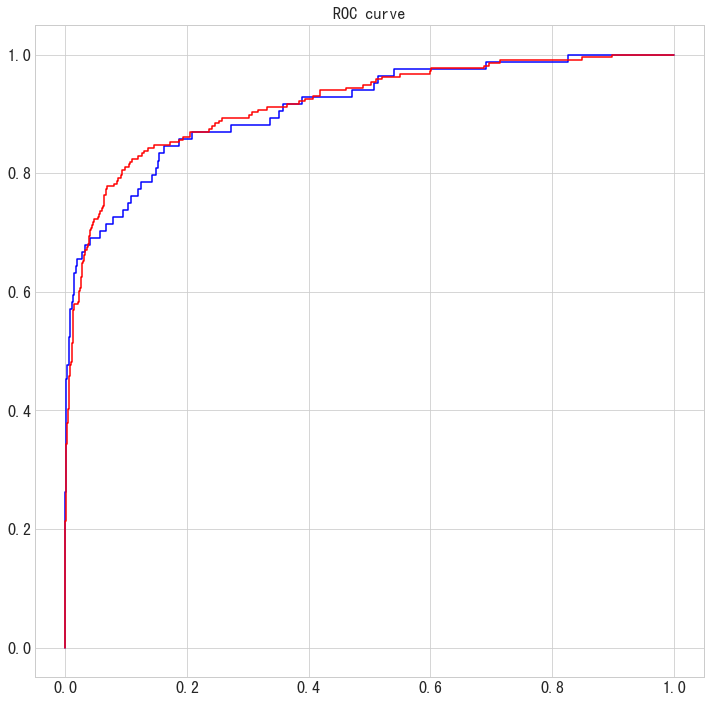

AUC = 0.9113


In [551]:
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

<font color=red size=3> Random Forest建模 </font>

In [581]:
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[6,7,8],
    'n_estimators':[13,15,20],  #决策树个数-随机森林特有参数
    'max_features':[0.2,0.3,0.4,], #每棵决策树使用的变量占比-随机森林特有参数
    'min_samples_split':[8,10,12],
    'class_weight':[{1:10,0:1},{1:5,0:1}]
}

In [582]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()
rfccv = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1', cv=4)
rfccv.fit(x_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [6, 7, 8], 'n_estimators': [13, 15, 20], 'max_features': [0.2, 0.3, 0.4], 'min_samples_split': [8, 10, 12], 'class_weight': [{1: 10, 0: 1}, {1: 5, 0: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [583]:
rfccv.best_params_

{'class_weight': {1: 5, 0: 1},
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.3,
 'min_samples_split': 10,
 'n_estimators': 13}

In [584]:
y_train_predict = rfccv.predict(x_train)
y_test_predict = rfccv.predict(x_test)
y_train_proba = rfccv.predict_proba(x_train)[:, 1]  
y_test_proba = rfccv.predict_proba(x_test)[:, 1]

In [585]:
print("RandomForest accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

RandomForest accuracy:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       876
         1.0       0.67      0.71      0.69        84

   micro avg       0.94      0.94      0.94       960
   macro avg       0.82      0.84      0.83       960
weighted avg       0.95      0.94      0.94       960



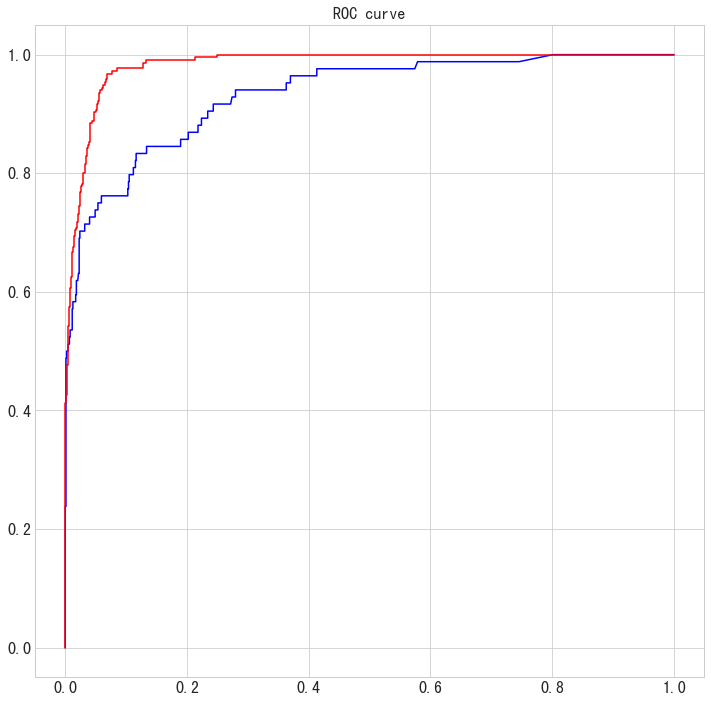

AUC = 0.9323


In [586]:
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)

plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

<font color=red size=3> XGboost建模 </font>

In [52]:
import xgboost as xgb

In [53]:
dtrain=xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

In [54]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

<font color=red size=3> 参数调优 </font>

In [133]:
param_test1 = {
 'max_depth':[6,8],
 'n_estimators':[800,1000],
 'learning_rate':[0.01,0.1]
}

In [134]:
xgb_grid_search1 = GridSearchCV(estimator = XGBClassifier(
    #max_depth=6,
    #n_estimators=800,
    #learning_rate=0.01,
    min_child_weight=1, 
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, seed=27), 
    param_grid = param_test1,
    scoring='f1',n_jobs=4,iid=False, cv=5)
xgb_grid_search1.fit(x_train,y_train)
xgb_grid_search1.best_params_,xgb_grid_search1.best_score_

({'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000},
 0.9349427864807082)

In [162]:
param_test1 = {
    'min_child_weight':[15,18],
   'gamma':[i/10.0 for i in range(0,5)], 
    #'subsample':[0.3,0.5,0.8],
   #'colsample_bytree':[0.8,1]
    'scale_pos_weight':[1,2,3]
}

In [163]:
xgb_grid_search1 = GridSearchCV(estimator = XGBClassifier(
    max_depth=8,
    n_estimators=800,
    learning_rate=0.01,
    #min_child_weight=15, 
    #gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic', 
    nthread=4, 
    #scale_pos_weight=1, 
    seed=27), 
    param_grid = param_test1,
    scoring='f1',n_jobs=4,iid=False, cv=4)
xgb_grid_search1.fit(x_train,y_train)
xgb_grid_search1.best_params_,xgb_grid_search1.best_score_

({'gamma': 0.3, 'min_child_weight': 15, 'scale_pos_weight': 1},
 0.9351227258811712)

In [55]:
params = {
        'n_estimators':1000,
        'eta': 0.01, 
        'max_depth': 6, 
        'gamma':0.3,
        'min_child_weight':15,
        'subsample': 0.8, 
        'colsample_bytree': 1, 
        'objective': 'binary:logistic', 
        'eval_metric': 'error', 
        'seed': 99, 
        'silent': True,
        'scale_pos_weight':1
    }

In [56]:
watchlist=[(dtrain,'train'),(dtest,'eval')]

In [57]:
xgbmodel = xgb.train(params,dtrain,evals=watchlist,num_boost_round=3000,early_stopping_rounds=100,verbose_eval=10)

[0]	train-error:0.063465	eval-error:0.059685
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 100 rounds.
[10]	train-error:0.063465	eval-error:0.063626
[20]	train-error:0.061052	eval-error:0.058559
[30]	train-error:0.060569	eval-error:0.060248
[40]	train-error:0.051641	eval-error:0.059122
[50]	train-error:0.050917	eval-error:0.059685
[60]	train-error:0.051641	eval-error:0.059685
[70]	train-error:0.051158	eval-error:0.060248
[80]	train-error:0.049952	eval-error:0.060811
[90]	train-error:0.050193	eval-error:0.060811
[100]	train-error:0.04971	eval-error:0.0625
[110]	train-error:0.049952	eval-error:0.061937
Stopping. Best iteration:
[13]	train-error:0.061535	eval-error:0.057432



In [58]:
from xgboost import plot_importance

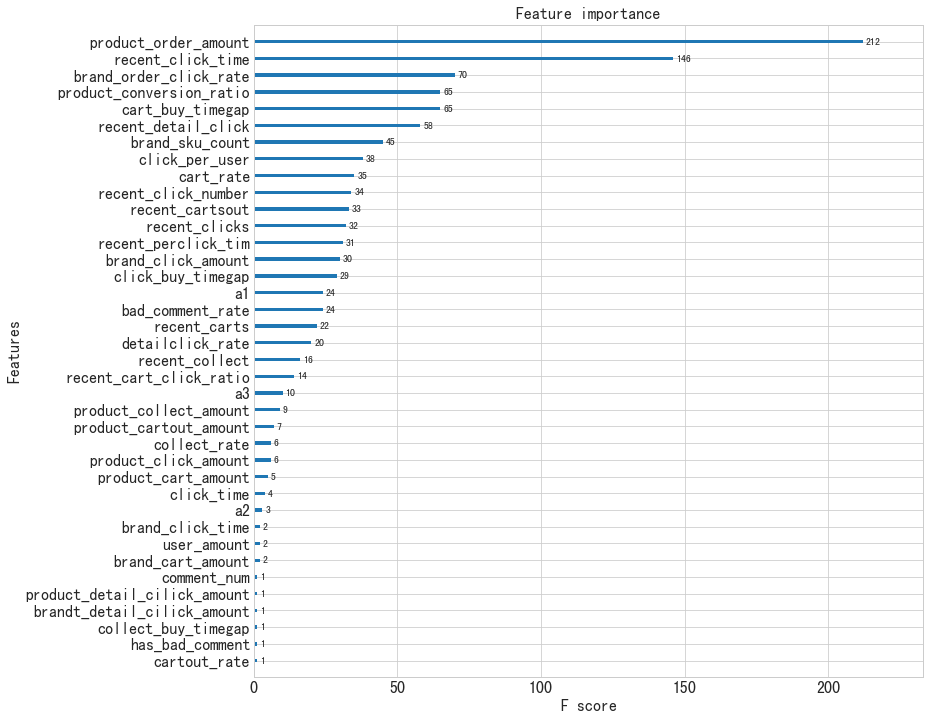

In [59]:
fig,ax = plt.subplots(figsize=(12,12))
plot_importance(xgbmodel,ax=ax)

In [60]:
x_train_d=xgb.DMatrix(x_train)
x_test_d=xgb.DMatrix(x_test)

In [67]:
def threshold(x):
    if x>0.39:
        x=1
    else:
        x=0
    return x

In [68]:
y_train_proba = xgbmodel.predict(x_train_d)  
y_test_proba = xgbmodel.predict(x_test_d)
y_train_predict = [threshold(i) for i in y_train_proba]
y_test_predict = [threshold(i) for i in y_test_proba]

In [69]:
from sklearn import metrics
print("xgboost accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

xgboost accuracy:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1065
         1.0       0.90      0.94      0.92       711

   micro avg       0.93      0.93      0.93      1776
   macro avg       0.93      0.93      0.93      1776
weighted avg       0.93      0.93      0.93      1776



In [63]:
5*0.93 *0.95 /2*0.95+3*0.93  

4.8883125

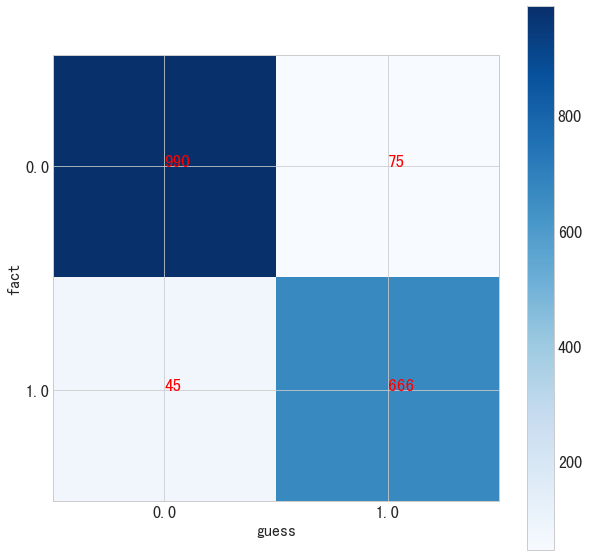

In [70]:
from sklearn.metrics import confusion_matrix
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.figure(figsize=[10, 10])
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.show()

AUC = 0.9790


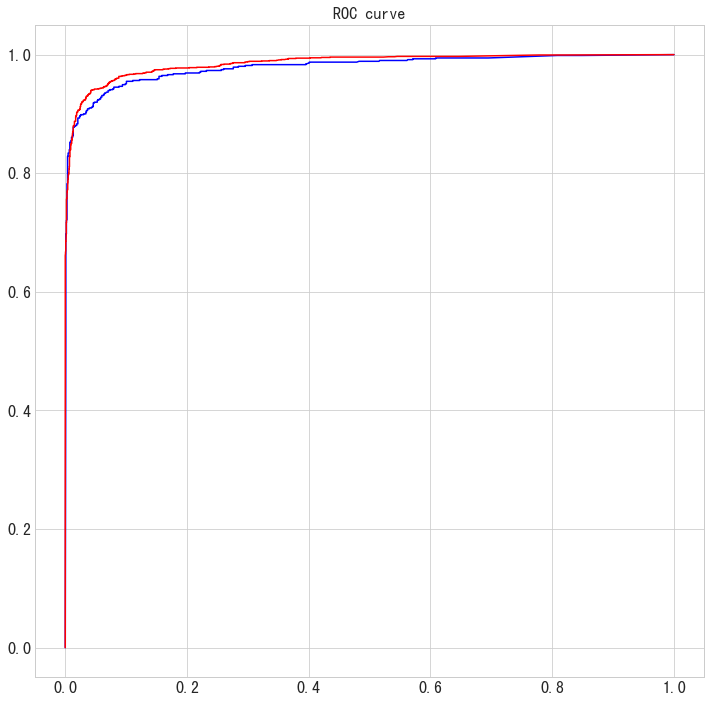

In [71]:

fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, y_test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, y_train_proba)
print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))
plt.figure(figsize=[12, 12])
plt.plot(fpr_test, tpr_test, 'b-')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()



In [321]:
data_fot_ana=pd.DataFrame(y_test)

In [322]:
data_fot_ana['predict']=y_test_proba
data_fot_ana.head()

,target,predict
1068,1.0,0.748816
27023,1.0,0.836565
27642,1.0,0.836565
236,0.0,0.415299
27076,1.0,0.836565


In [327]:
model_data['predict']=data_fot_ana['predict']
model_data[['target','predict','brand_order_click_rate']][(model_data['predict']>0)&(model_data['target']==1)].sort_values(by='brand_order_click_rate')

,target,predict,brand_order_click_rate
26313,1.0,0.174810,0.000000
25904,1.0,0.179980,0.071429
2010,1.0,0.292078,0.104651
2915,1.0,0.198917,0.106145
1904,1.0,0.224479,0.146939
27242,1.0,0.448424,0.146939
25113,1.0,0.170787,0.146939
24779,1.0,0.836565,0.217593
24783,1.0,0.836565,0.217593
24807,1.0,0.224813,0.217593


In [325]:
digraph = xgb.to_graphviz(xgbmodel)
digraph.format = 'png'
digraph.view()

'Digraph.gv.png'

<font color=red size=3> 模块五、应用与预测 </font>

<font color=red size=3> 5.1  target数据准备 </font>

In [72]:
data_Action_201604=pd.read_csv('d:/data/jd/JData_Action_201604.csv')
data_Action_201604_check_target=data_Action_201604[(data_Action_201604.time>'2016-04-11')&(data_Action_201604.time<'2016-04-16')]
target_201604_check=data_Action_201604_check_target[data_Action_201604_check_target['type']==4][['sku_id']]
target_201604_check['target']=1

In [73]:
target_201604_check['target'].count()

5091

<font color=red size=3> 5.2  加入近期行为数据 </font>

<font color=red size=3> 近期各商品点击数量，加购物车数量 </font>

In [74]:
def get_sku_action(data_train): 
    global target_201604_check,data_product
    recent_clicks=data_train[data_train['type']==1][['sku_id','type']].groupby('sku_id').sum().reset_index()
    data_for_model=pd.merge(data_product,recent_clicks,on='sku_id',how='left').rename(columns={'type':'recent_clicks'})
    recent_carts=data_train[data_train['type']==2][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_carts,on='sku_id',how='left').rename(columns={'type':'recent_carts'})
    recent_cartsout=data_train[data_train['type']==3][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_cartsout,on='sku_id',how='left').rename(columns={'type':'recent_cartsout'})
    recent_orders=data_train[data_train['type']==4][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_orders,on='sku_id',how='left').rename(columns={'type':'recent_orders'})
    recent_collect=data_train[data_train['type']==5][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_collect,on='sku_id',how='left').rename(columns={'type':'recent_collect'})
    recent_detail_click=data_train[data_train['type']==6][['sku_id','type']].groupby('sku_id').count().reset_index()
    data_for_model=pd.merge(data_for_model,recent_detail_click,on='sku_id',how='left').rename(columns={'type':'recent_detail_click'})
    data_for_model['recent_cart_click_ratio']=data_for_model['recent_carts']/data_for_model['recent_clicks']
    target_201604_check=pd.merge(data_for_model,target_201604_check,on='sku_id',how='left')

In [75]:
data_Action_201604_train_check=data_Action_201604[(data_Action_201604.time>'2016-04-06')&(data_Action_201604.time<'2016-04-11')]

In [76]:
get_sku_action(data_Action_201604_train_check)

In [77]:
target_201604_check_test=target_201604_check

<font color=red size=3> 近期各商品停留时间 </font>

In [78]:
def get_sku_actiontime(data_train):
    global target_201604_check_test
    data_train.time=pd.to_datetime(data_train.time)
    user_sku_time=data_train[['user_id','sku_id','time']].groupby(['user_id','sku_id']).time.apply(lambda x:x-x.shift(1))
    data_train['recent_click_time']=user_sku_time/np.timedelta64(1, 's')
    data_train['recent_click_time']=data_train['recent_click_time'][data_train['recent_click_time']<400]
    recent_click_number=data_train[['sku_id','recent_click_time']].groupby('sku_id').count().reset_index()
    recent_click_number=recent_click_number.rename(columns={'recent_click_time':'recent_click_number'})
    recent_click_time=data_train[['sku_id','recent_click_time']].groupby('sku_id').sum().reset_index()    
    recent_perclick_time=pd.merge(recent_click_time,recent_click_number,on='sku_id')
    target_201604_check_test=pd.merge(target_201604_check_test,recent_perclick_time,on='sku_id',how='left')    


In [79]:
get_sku_actiontime(data_Action_201604_train_check)

In [80]:
target_201604_check_test['recent_perclick_tim']=target_201604_check_test[['recent_click_time','recent_click_number']].apply(lambda x:x['recent_click_time']/x['recent_click_number'],axis=1)

In [81]:
model_data=target_201604_check_test

In [82]:
model_data.target.fillna(0,inplace=True)

In [83]:

model_data['target'].count()

25243

In [84]:
model_data['target'].sum()

1386.0

In [85]:
model_data=model_data.drop(columns='sku_id')

In [86]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25243 entries, 0 to 25242
Data columns (total 50 columns):
a1                              4087 non-null float64
a2                              4087 non-null float64
a3                              4087 non-null float64
brand_sku_count                 4087 non-null float64
comment_num                     3378 non-null float64
has_bad_comment                 3378 non-null float64
bad_comment_rate                3378 non-null float64
product_click_amount            4087 non-null float64
product_cart_amount             3043 non-null float64
product_cartout_amount          2787 non-null float64
product_order_amount            1779 non-null float64
product_collect_amount          2806 non-null float64
product_detail_cilick_amount    4076 non-null float64
cart_rate                       3043 non-null float64
cartout_rate                    2787 non-null float64
collect_rate                    2806 non-null float64
detailclick_rate           

<font color=red size=3> 5.3  模型导入与预测 </font>

In [87]:
y_test=model_data['target']

In [88]:
x_test_d=xgb.DMatrix(model_data[var_for_select])

In [89]:
def threshold(x):
    if x>0.38:
        x=1
    else:
        x=0
    return x

In [90]:
y_test_proba = xgbmodel.predict(x_test_d)
y_test_predict = [threshold(i) for i in y_test_proba]

In [91]:
from sklearn import metrics
print("gradient boosting accuracy:")
print(metrics.classification_report(y_test,y_test_predict))

gradient boosting accuracy:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23857
         1.0       0.91      0.91      0.91      1386

   micro avg       0.99      0.99      0.99     25243
   macro avg       0.95      0.95      0.95     25243
weighted avg       0.99      0.99      0.99     25243



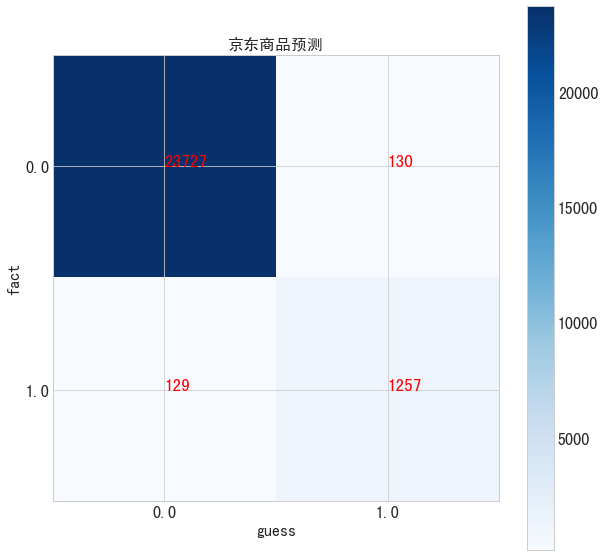

In [93]:
from sklearn.metrics import confusion_matrix
classes = list(set(y_test))
classes.sort()
confusion = confusion_matrix(y_test_predict, y_test)
plt.figure(figsize=[10, 10])
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],fontsize='xx-large',color='red')
plt.title('京东商品预测')
plt.show()


<font color=red size=3> 模块六、模型保存 </font>

In [ ]:
import pickle as pickle

In [ ]:
with open(r'logitic.model', 'wb') as f:
    pickle.dump(logistic_model, f)

In [ ]:
test_est_load = model_load.predict(test_data)